![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 7 - Introducción a Python y Pandas**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

Gómez Ocampo Matías  



# **Warning**

Espero no aterrorizar a los docentes de la diplomatura con el presente trabajo.

PS: es la primera vez que hago algo como esto


# **Activar módulos necesarios**

In [51]:
!pip install plotly --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import pandas as pd
import numpy as np
import pandas_datareader as dtr
import plotly.express as px

# **Obtener datos**

In [53]:
# traigo el archivo csv desde github

datos = "https://raw.githubusercontent.com/matizion/matizion/main/History_of_Mass_Shootings_in_the_USA.csv"



# **Crear un DataFrame**

In [54]:
df= pd.read_csv(datos)

## **Visualizaciones del DataFrame**

Visualizo la totalidad del csv
Cuando estaba terminando el trabajo me dí cuenta de estaba cómo estado Washington y Washington D.C., entiendo que es lo mismo y para poder graficar sin problemas hago un replace (esto lo hago desde mi desconocimiento de si W DC es lo mismo que W).
Mismo caso con Pennsylvania con Pennsylvania Jenkins Township.

In [55]:
df['State'] = df['State'].replace('Washington D.C.','Washington')
df['State'] = df['State'].replace('Pennsylvania  Jenkins Township','Pennsylvania')
df

,Date,City,State,Dead,Injured,Total,Description
0,31-07-2022,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at..."
1,31-07-2022,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i..."
2,31-07-2022,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...
3,31-07-2022,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i..."
4,31-07-2022,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...
...,...,...,...,...,...,...,...
2707,17-06-1933,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...
2708,25-12-1929,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...
2709,14-02-1929,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...
2710,21-11-1927,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...


## **Información del DataFrame y de los datos**

In [56]:
df.head()

,Date,City,State,Dead,Injured,Total,Description
0,31-07-2022,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at..."
1,31-07-2022,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i..."
2,31-07-2022,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...
3,31-07-2022,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i..."
4,31-07-2022,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...


In [57]:
df.dtypes

Date           object
City           object
State          object
Dead            int64
Injured         int64
Total           int64
Description    object
dtype: object

In [58]:
#corrijo el tipo de dato de la columna date, está como object

df["Date"]= pd.to_datetime(df.Date, infer_datetime_format=True)

In [59]:
df.dtypes

Date           datetime64[ns]
City                   object
State                  object
Dead                    int64
Injured                 int64
Total                   int64
Description            object
dtype: object

In [60]:
df.shape

(2712, 7)

In [61]:
df.index

RangeIndex(start=0, stop=2712, step=1)

In [62]:
df.columns

Index(['Date', 'City', 'State', 'Dead', 'Injured', 'Total', 'Description'], dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2712 non-null   datetime64[ns]
 1   City         2712 non-null   object        
 2   State        2712 non-null   object        
 3   Dead         2712 non-null   int64         
 4   Injured      2712 non-null   int64         
 5   Total        2712 non-null   int64         
 6   Description  2712 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 148.4+ KB


In [64]:
df.size

18984

In [65]:
df.describe()

,Dead,Injured,Total
count,2712.000000,2712.000000,2712.000000
mean,1.436578,4.401180,5.837021
std,2.880447,8.532826,10.130793
min,0.000000,0.000000,2.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,2.000000,5.000000,6.000000
max,61.000000,411.000000,472.000000


In [66]:
df.describe(include=["object"])


,City,State,Description
count,2712,2712,2712
unique,920,58,2681
top,Chicago,Illinois,Four people were injured in a shooting.
freq,198,274,12


In [67]:
df.Dead.describe()

count    2712.000000
mean        1.436578
std         2.880447
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        61.000000
Name: Dead, dtype: float64

In [68]:
df.Injured.describe()

count    2712.000000
mean        4.401180
std         8.532826
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max       411.000000
Name: Injured, dtype: float64

In [69]:
df.Total.describe()

count    2712.000000
mean        5.837021
std        10.130793
min         2.000000
25%         4.000000
50%         4.000000
75%         6.000000
max       472.000000
Name: Total, dtype: float64

# **Trabajando con el DataFrame**

## **Eliminando datos no disponibles y duplicados**

In [70]:
df.dropna(how='any')
df.drop_duplicates()


,Date,City,State,Dead,Injured,Total,Description
0,2022-07-31,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at..."
1,2022-07-31,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i..."
2,2022-07-31,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...
3,2022-07-31,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i..."
4,2022-07-31,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...
...,...,...,...,...,...,...,...
2707,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...
2708,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...
2709,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...
2710,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...


In [71]:
insane_killings = df[df.Dead > 10 ]

In [72]:
insane_killings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 193 to 2711
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         27 non-null     datetime64[ns]
 1   City         27 non-null     object        
 2   State        27 non-null     object        
 3   Dead         27 non-null     int64         
 4   Injured      27 non-null     int64         
 5   Total        27 non-null     int64         
 6   Description  27 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.7+ KB


In [73]:
# no me voy a ir a vivir a Texas

insane_killings

,Date,City,State,Dead,Injured,Total,Description
193,2022-05-24,Uvalde,Texas,22,18,40,Robb Elementary School shooting: An 18-year-ol...
2012,2019-05-31,Virginia Beach,Virginia,13,4,17,2019 Virginia Beach shooting: A gunman killed ...
2116,2019-03-08,El Paso,Texas,23,23,46,2019 El Paso shooting: 23 people were killed a...
2255,2018-10-27,Pittsburgh,Pennsylvania,11,6,17,Pittsburgh synagogue shooting: A man opened fi...
2349,2018-07-11,Thousand Oaks,California,13,16,29,Thousand Oaks shooting: A man entered a bar ho...
2480,2018-02-14,Parkland,Florida,17,17,34,Stoneman Douglas High School shooting: A forme...
2532,2017-05-11,Sutherland Springs,Texas,27,22,49,Sutherland Springs church shooting: A gunman a...
2536,2017-01-10,Paradise,Nevada,61,411,472,2017 Las Vegas shooting: A man on the 32nd flo...
2538,2016-12-06,Orlando,Florida,50,58,108,Orlando nightclub shooting: A gunman killed 49...
2560,2015-02-12,San Bernardino,California,16,22,38,2015 San Bernardino attack: A married couple o...


In [74]:
insane_casualties = df[df.Total > 40 ]
insane_casualties

,Date,City,State,Dead,Injured,Total,Description
84,2022-07-04,Highland Park,Illinois,7,48,55,Highland Park parade shooting: Seven people we...
2116,2019-03-08,El Paso,Texas,23,23,46,2019 El Paso shooting: 23 people were killed a...
2532,2017-05-11,Sutherland Springs,Texas,27,22,49,Sutherland Springs church shooting: A gunman a...
2536,2017-01-10,Paradise,Nevada,61,411,472,2017 Las Vegas shooting: A man on the 32nd flo...
2538,2016-12-06,Orlando,Florida,50,58,108,Orlando nightclub shooting: A gunman killed 49...
2580,2012-07-20,Aurora,Colorado,12,70,82,"Aurora, Colorado, movie theater shooting: Jame..."
2593,2009-05-11,Fort Hood,Texas,14,33,47,2009 Fort Hood shooting: A U.S. army psychiatr...
2607,2007-04-16,Blacksburg,Virginia,33,17,50,Virginia Tech shooting: A 23-year-old student ...
2653,1991-10-16,Killeen,Texas,24,27,51,"Killeen, Texas, Luby's Restaurant shooting: A ..."
2664,1987-07-12,Cayucos,California,43,0,43,Pacific Southwest Airlines Flight 1771 The pe...


## **Insertando columnas**

In [75]:
#agregué la columna country
df["Country"]= "United States"

## **Renombrando columnas**

In [76]:
#inserto una columna con una condición de suma para que Cristian no se enoje y dropeo la columna Total

df.insert(5, column= "Casualties", value = df.Dead + df.Injured)
df.drop(columns="Total", inplace=True)

In [77]:
# Chequeo el cambio y aparentemente corre
df.head()

,Date,City,State,Dead,Injured,Casualties,Description,Country
0,2022-07-31,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at...",United States
1,2022-07-31,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i...",United States
2,2022-07-31,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...,United States
3,2022-07-31,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i...",United States
4,2022-07-31,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...,United States


## **Reindexando index**

In [78]:
df = df.sort_values(by="Date", ascending=False)
df = df.reset_index(drop=True)
df

,Date,City,State,Dead,Injured,Casualties,Description,Country
0,2022-07-31,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at...",United States
1,2022-07-31,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...,United States
2,2022-07-31,South Bend,Indiana,0,4,4,A person shot four people in two different loc...,United States
3,2022-07-31,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i...",United States
4,2022-07-31,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i...",United States
...,...,...,...,...,...,...,...,...
2707,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...,United States
2708,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...,United States
2709,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...,United States
2710,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...,United States


# **Grabando**

## **Grabar el DataFrame como un archivo CSV**

In [79]:
df.to_csv("Mass Murder.csv")


# **Gráficos**

## **Desarrollar gráficos del DataFrame**

In [110]:
Massacre = df.sort_values(by="Casualties", ascending=False)
Massacre = df.groupby("State").sum()
Massacre.head()

,Dead,Injured,Casualties
State,,,
Alabama,78,261,339
Alaska,16,14,30
Arizona,54,135,189
Arkansas,39,175,214
California,472,985,1457


In [111]:
Massacre.reset_index(inplace=True)
Massacre

,State,Dead,Injured,Casualties
0,Alabama,78,261,339
1,Alaska,16,14,30
2,Arizona,54,135,189
3,Arkansas,39,175,214
4,California,472,985,1457
5,Colorado,106,277,383
6,Colorado Springs,5,5,10
7,Connecticut,47,68,115
8,Delaware,13,45,58
9,District of Columbia,2,19,21


Muertes en masacres desde 1924 a 2022 por estado


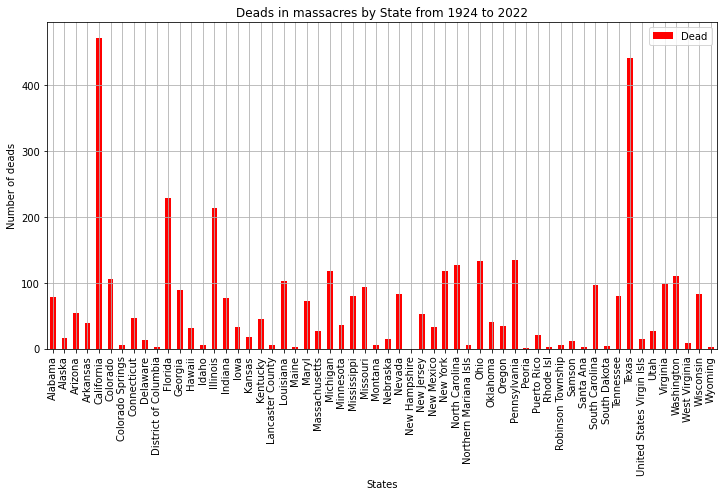

In [82]:
Massacre.plot("State","Dead", 
           kind="bar",
           figsize=(12,6),
           color=["red"],
           grid=True,
           title= "Deads in massacres by State from 1924 to 2022",
           ylabel = "Number of deads",
           xlabel = "States");

California and Texas are not my first choice for living.

Heridos en masacres desde 1924 a 2022 por estado

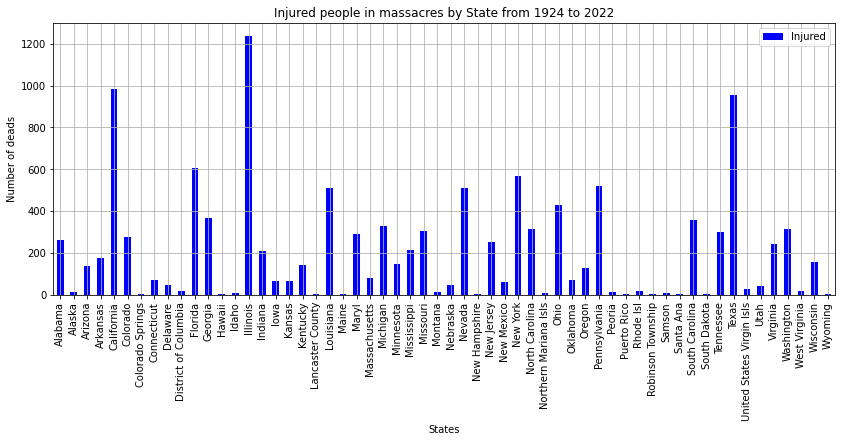

In [83]:
Massacre.plot("State","Injured", 
           kind="bar",
           figsize=(14,5),
           color=["blue"],
           grid=True,
           title= "Injured people in massacres by State from 1924 to 2022",
           ylabel = "Number of deads",
           xlabel = "States");

Muertes en masacres desde 1924 a 2022 por estado (barras horizontal)

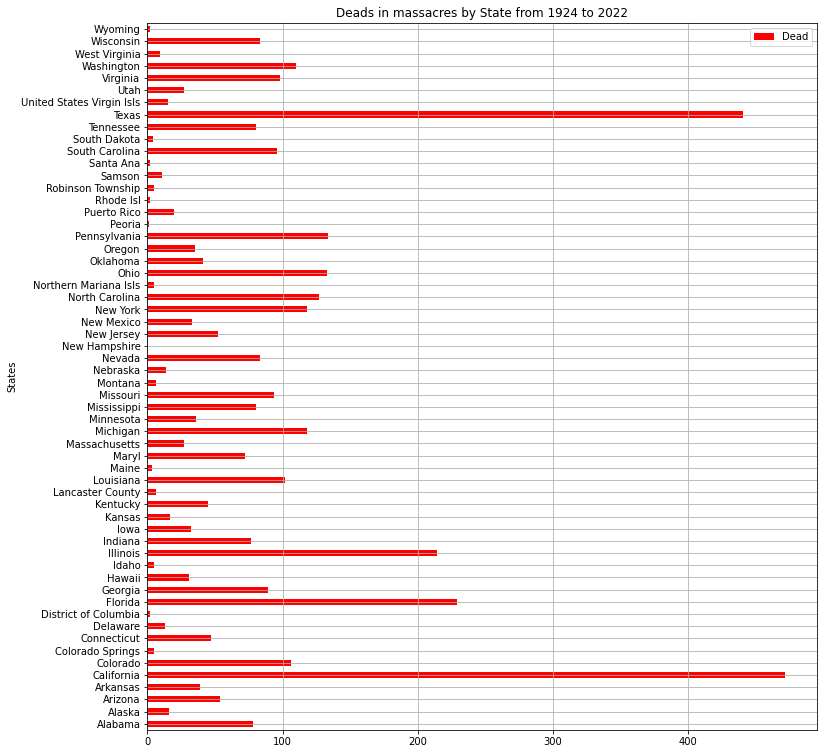

In [84]:
Massacre.plot("State","Dead", 
           kind="barh",
           figsize=(12,13),
           color=["red"],
           grid=True,
           title= "Deads in massacres by State from 1924 to 2022",
           ylabel = "Number of deads",
           xlabel = "States"); 

Cantidad de personas damnificadas en masacres desde 1924 a 2022

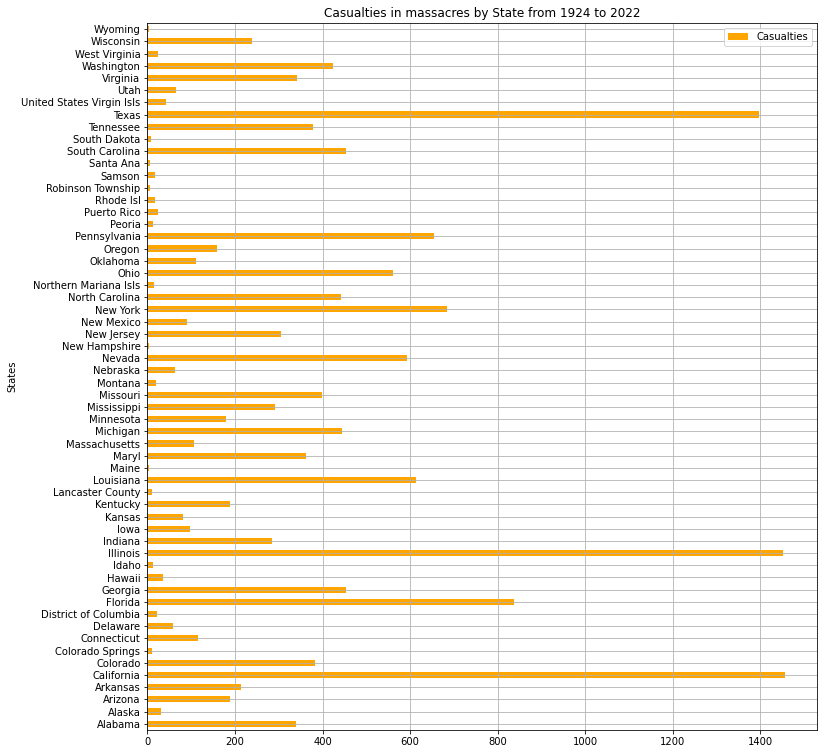

In [85]:
Massacre.plot("State","Casualties", 
           kind="barh",
           figsize=(12,13),
           color=["orange"],
           grid=True,
           title= "Casualties in massacres by State from 1924 to 2022",
           ylabel = "Number of Casualties",
           xlabel = "States");

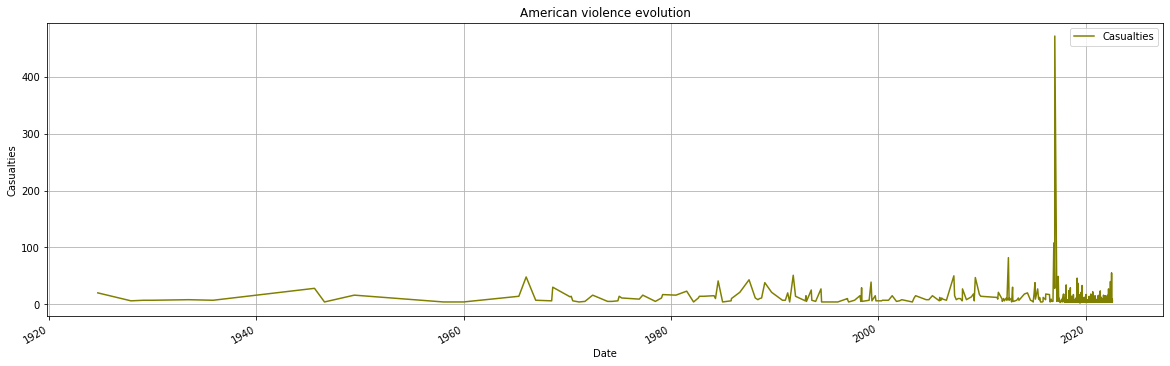

In [86]:
df.plot("Date", "Casualties",
        kind= "line",
        figsize=(20,6),
        color="olive",
        grid=True,
        title = "American violence evolution",
        ylabel = "Casualties",
        xlabel = "Date",
        );

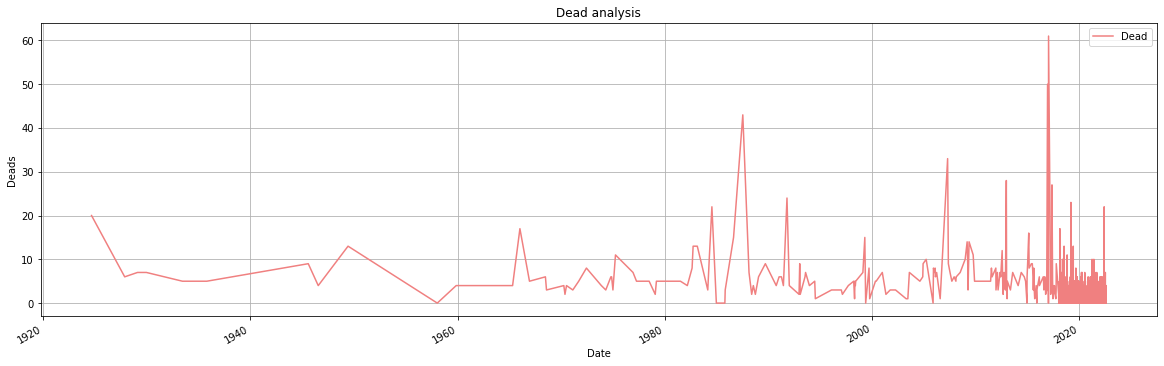

In [87]:
df.plot("Date", "Dead",
        kind= "line",
        figsize=(20,6),
        color="lightcoral",
        grid=True,
        title = "Dead analysis",
        ylabel = "Deads",
        xlabel = "Date",
        );

In [88]:
Texas = df[df.State == "Texas"]
Texas

,Date,City,State,Dead,Injured,Casualties,Description,Country
17,2022-07-24,Dallas,Texas,1,3,4,An argument among a group of people led to a m...,United States
20,2022-07-24,Fort Worth,Texas,1,3,4,One person was killed and three others injured...,United States
30,2022-07-23,El Paso,Texas,0,4,4,Four people were shot during a large party at ...,United States
46,2022-07-16,Houston,Texas,4,0,4,Four people were fatally shot at an apartment ...,United States
62,2022-07-10,Alvin,Texas,1,3,4,One man was killed and three others wounded in...,United States
...,...,...,...,...,...,...,...,...
2653,1991-10-16,Killeen,Texas,24,27,51,"Killeen, Texas, Luby's Restaurant shooting: A ...",United States
2654,1991-06-12,Austin,Texas,4,0,4,1991 Austin Yogurt Shop murders: Four teenage ...,United States
2677,1980-06-22,Daingerfield,Texas,5,11,16,Daingerfield church shooting: The perpetrator ...,United States
2691,1971-02-15,Dallas,Texas,3,1,4,1971 Shooting of Dallas Police Officers: Two m...,United States


Justificación gráfica de las 90 películas "Masacre en Texas"

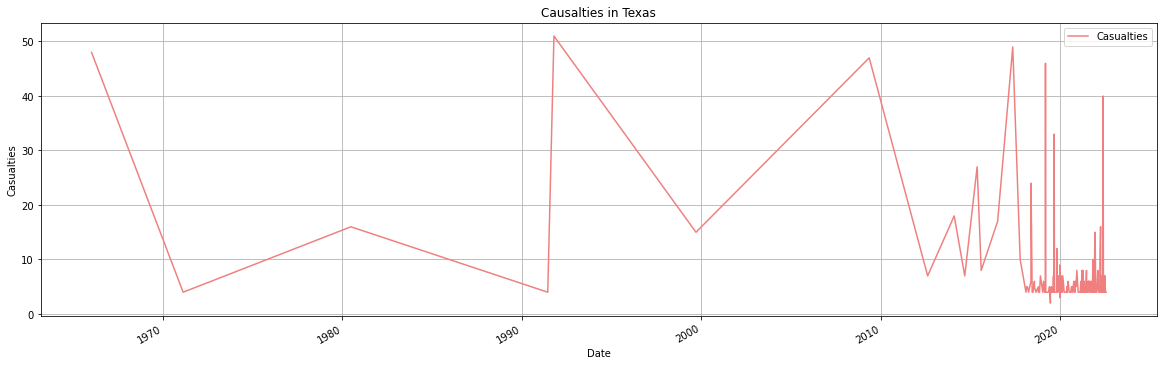

In [89]:
Texas.plot("Date", "Casualties",
        kind= "line",
        figsize=(20,6),
        color="lightcoral",
        grid=True,
        title = "Causalties in Texas",
        ylabel = "Casualties",
        xlabel = "Date",
        );

In [127]:
fig = px.bar (Texas,
              x= "Date" ,
              y = ["Dead", "Injured"],
              template = "gridon",
              )
fig.show()

In [95]:
px.strip (df, 
          x = "Dead", 
          hover_name= "City", 
          template = "gridon", 
          color = "State")

In [109]:
px.treemap(df, 
           values = "Casualties", 
           path = ["State", "City"], 
           color ="Dead", 
           hover_name = "State", 
           height= 800)

Puse un treemap no me animé al gráfo circular por miedo a Luca y su odio a ese tipo de gráficos.

In [133]:
px.scatter(df,
           x = "Date",
           y = "Casualties",
           hover_name= "State",
           color = "Dead",
           size ="Casualties",
           template = "gridon",
           )

Se ve un claro incremento de este tipo de hechos en los últimos 20 años.
Hay una tendencia a la ocurrencia de este tipo de hecho, en los últimos tiempos.

## Probando cosas post festejo de que me salió un grafo

In [160]:
Deads=df.groupby("State")["Dead"].sum ()
Deads.head()


State
Alabama        78
Alaska         16
Arizona        54
Arkansas       39
California    472
Name: Dead, dtype: int64

In [169]:
Injured =df.groupby("State")["Injured"].sum ()
Injured.head()

State
Alabama        4
Alaska         0
Arizona        4
California    20
Colorado      10
Name: Injured, dtype: int64

In [111]:
Casualties=df.groupby("State")["Casualties"].sum ()
Casualties

State
Alabama                       339
Alaska                         30
Arizona                       189
Arkansas                      214
California                   1457
Colorado                      383
Colorado Springs               10
Connecticut                   115
Delaware                       58
District of Columbia           21
Florida                       837
Georgia                       454
Hawaii                         35
Idaho                          12
Illinois                     1453
Indiana                       285
Iowa                           98
Kansas                         82
Kentucky                      188
Lancaster County               11
Louisiana                     613
Maine                           4
Maryl                         363
Massachusetts                 106
Michigan                      444
Minnesota                     180
Mississippi                   291
Missouri                      398
Montana                        20
Nebraska

No puedo creer que haya terminado este TP! 
Muchas gracias Cristian y Gustavo por todo lo enseñado, increíble lo bien que está el material de estudio y lo paso a paso que van las clases, sin eso ya hubiera tirado la compu por el balcón.